## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

- Котлярчуа Оксана (Lz77, Deflate)
- Сампара Софія (Lzw, Huffman)

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [1]:
import heapq
from collections import Counter

class Node:
    def __init__(self, char=None, frequency=None):
        self.char = char
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

class Huffman:
    @classmethod
    def encode(cls, text: str) -> tuple[str, dict[str, str]]:
        if not text:
            return None

        root = cls.build_tree(text)
        codes = cls.build_codes(root)

        encoded_text = ''.join(codes[char] for char in text)
        return encoded_text, codes

    @staticmethod
    def build_tree(text):
        char_frequency = Counter(text)
        heap = [Node(char, freq) for char, freq in char_frequency.items()]
        heapq.heapify(heap)

        while len(heap) > 1:
            left_child = heapq.heappop(heap)
            right_child = heapq.heappop(heap)

            internal_node = Node(frequency=left_child.frequency + right_child.frequency)
            internal_node.left = left_child
            internal_node.right = right_child

            heapq.heappush(heap, internal_node)

        return heap[0]

    @classmethod
    def build_codes(cls, root, current_code="", codes=None):
        if codes is None:
            codes = {}
        if root is not None:
            if root.char is not None:
                codes[root.char] = current_code
            cls.build_codes(root.left, current_code + "0", codes)
            cls.build_codes(root.right, current_code + "1", codes)
        return codes

    @staticmethod
    def decode(code: str, coding_dict: dict[str, str]):
        if not code or not coding_dict:
            return None

        reverse_codes = {code_word: char for char, code_word in coding_dict.items()}
        current_code = ""
        decoded_text = ""

        for bit in code:
            current_code += bit
            if current_code in reverse_codes:
                decoded_text += reverse_codes[current_code]
                current_code = ""

        return decoded_text


Як працює
Функція encode:
На вхід приймає текст, який потрібно закодувати. Знаходимо корінь дерева Гаффмана (функція build_tree), щоб побудувати коди.
Тоді, маючи дані про корінь, можемо побудувати самі кодові комбінації (функція build_codes). Функція повертає рядок із закодованим текстом
і словник усіх комбінацій.

Функція build_tree:
Функція приймає текст, який ми хочемо закодувати. Вона рахує частоту появи кожного символа у тексті (з допомогою collections.counter),
створює список з вершин (екзкмпляри класу Node) та сортує їх за ймовірностями (за допомогою heapq). Далі функція бере дві вершини 
з найменшою ймовірністю (видаляє їх з heap), додає в heap нову вершину з сумою ймовірностей найменших (якій присвоює правого і лівого сина). Так продовжується, доки ми не побудуємо дерево і в heap не залишиться єдина вершина з ймовірністю 1. Функція повертає цю вершину.

Функція build_codes:
Приймає корінь, який повернула функція build_tree. Заходить в нього та надає значання її синам (правому сину 0, а лівому 1). Якщо у вершини є символ, який ми хочемо закодувати (тобто вона є листком), тоді додаємо до словника кодів цей символ і його код. Повертає функція словник з символів і йхнього коду.

Функція decode:
Приймає закодований текст та словник. Ходить по тексту, "назбируючи" символи, поки не наткнеться на послідовність, яка є в словнику. Коли знаходить (наш код є роздільним, тому немає плутанини), додає символ, що відповідає цьому коду до декодованого тексту. 

# Алгоритм LZW

In [2]:
'''LZW algorithm encoding and decoding'''
class LZW:
    '''LZW algorithm encoding and decoding'''
    @staticmethod    
    def encode(text: str) -> tuple[str, list]:
        '''Encode a string message'''        
        encoded_message = ''
        output_dict = list(set(text))        
        list_of_codes = list(set(text))
        current_str = text[0]        
        for char in text[1:]:
            new_str = current_str + char            
            if new_str in list_of_codes:
                current_str = new_str            
            else:
                encoded_message += str(list_of_codes.index(current_str)) + ','                
                list_of_codes.append(new_str)
                current_str = char        
                encoded_message += str(list_of_codes.index(current_str))
        return encoded_message, output_dict

    @staticmethod    
    def decode(code: str, coding_dict: list) -> str:
        '''Decode a message'''        
        result = ""
        encoded_message = code.split(',')        
        current_code = int(encoded_message[0])
        result += coding_dict[current_code]        
        for code in encoded_message[1:]:
            code = int(code)            
            if code < len(coding_dict):
                entry = coding_dict[code]            
            else:
                entry = coding_dict[current_code] + coding_dict[current_code][0]            
                result += entry
            coding_dict.append(coding_dict[current_code] + entry[0])            
            current_code = code
        return result

LZW алгоритм
Функція encode:
Приймає текст, який потрібно закодувати. Переглядає текст і формує два словники (списки) з унікальних елементів (один з них потім поверне декодеру, а інший буде генерувати натупні коди). Далі беремо перший символ і наступний, якщо такої послідовності нема, то додаємо її до словника і в вихідний код додаємо індекс першого елементу. Якщо ж така комбвнація вже є у словнику, то беремо ще наступний символ, дивимося, чи така послідовність є у словнику, якщо ні, додаємо її до словника і в вихідний код додаємо індекс першого елементу + другий. Так робимо до кінця рядка, аде всі індекси розділяємо комами. Повертає функція закодоване повідомлення та початковий словник.

Фуекція decode:
Приймає закодоване повідомлення та початковий словник. Починаємо декодування розбивши рядок code за комами, щоб отримати список індексів. Початкове кодоване значення береться з першого елементу закодованого повідомлення і використовується для отримання його символу з coding_dict. Цей символ додається до вихідного рядка. Далі проходимо по решті кодованих значень у рядку. Для кожного індекса перевіряємо, чи є він менше, ніж довжина coding_dict. Якщо так, ми беремо відповідний символ із coding_dict. Якщо ні, то ми створюємо новий символ, використовуючи інформацію про попередній символ із coding_dict, а саме, додаємо до нього його перший символ. Цей новий символ додаємо до вихідного рядка. Після цього новий символ додається до coding_dict як комбінація попереднього символу із coding_dict та його першого символу, що дозволяє побудувати новий символ для наступного коду. Останній код стає поточним кодом для майбутніх ітерацій. Функція повертає рядок як декодоване повідомлення.

# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [3]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buffer_len = buffer_size

    def encode(self, text: str) -> str:
        accepted = ''
        res = []
        for idx, el in enumerate(text):
            buff_strt = idx-self.buffer_len if idx-self.buffer_len > 0 else 0
            if el in text[buff_strt:idx] and accepted+el in text[:idx]:
                accepted += el
            else:
                first_id = idx - len(accepted) - text[:idx-1].rfind(accepted) if accepted else 0
                not_acc = el
                res.append((first_id, len(accepted), not_acc))
                accepted = ''
            if idx == len(text) - 1 and accepted:
                res.append((first_id, len(accepted), ''))
        return self._list2text(res)

    def decode(self, code: str) -> str:
        code = self._text2list(code)
        msg = ''
        for idx, num, add in code:
            for _ in range(num):
                msg += msg[-idx]
            msg += add
        return msg
    
    @staticmethod
    def _text2list(text):
        res = []
        codes = text[1:-1].split('>, <')
        for code in codes:
            res.append(tuple(code.split(', ')))
        return res

    @staticmethod
    def _list2text(lst):
        res = ''
        for idx, tupl in enumerate(lst):
            res += f'<{tupl[0]}, {tupl[1]}, {tupl[2]}>'
            if idx != len(lst)-1:
                res+=', '
        return res

Як працює:

Функція encode:
Проходиться по кожному елементу тексту. Перевіряє, чи є цей елемент у буфері, а також, чи є він у послідовності (якщо елементи, що йшли перед ним були прийняті). Після того, як знайшовся елемент, якого в буфері немає задаються змінні first_id- індекс першого входження та not_acc - елемент, який не зустрічався в буфері
Результат повертається у вигляді (індекс, довжина accepted, неприйнятий елемент). Також є додаткова перевірка для останнього елементу, якщо він увійшов до буфера. Результат податися у вигляді тексту за допомогою методу _list2text.

Метод _list2text:
Перебирає кожен кортеж у списку і надає йому вигляд стрічки, обмеженої "<>"

Функція decode:
Переводить текст у список таплів за допомогою методу _text2list.
Додає елемент з від'ємним індексом, який відповідає вказаному стільки разів, скільки вказує 2 елемент кортежу і вінці додає 3 елемент.

Метод _text2list:
Розділяє всі конструкції по стрілках і об'єднає отримані елементи в кортежі по 3.

# Алгоритм Deflate

In [ ]:
class Deflate:
    def __init__(self, buffer_size: int):
        self.buffer = buffer_size
        self.dictionary = {}

    def encode(self, text: str) -> str:
        # lz77 = LZ77(self.buffer)
        # lz77_coded = LZ77._text2list(lz77.encode(text))
        # self.indexes = [(code[0], code[1]) for code in lz77_coded]
        # code_to_use = ''.join([code[2] for code in lz77_coded])
        # encoded_text, code_dict = Huffman.encode(code_to_use)
        # self.dictionary = code_dict

        # return encoded_text
        lz77 = LZ77(self.buffer)
        lz77_coded = lz77.encode(text)

        encoded_text, code_dict = Huffman.encode(lz77_coded)
        self.dictionary = code_dict

        return encoded_text
        

    def decode(self, code: str) -> str:
        

        decoded_by_h = Huffman.decode(code, self.dictionary)
        # decoded_by_h = ''.join([a for a in decoded_by_h if a.isalpha()])
        # result = []
        # for idx, char in enumerate(decoded_by_h):
        #     result.append((int(self.indexes[idx][0]), int(self.indexes[idx][1]), char))
    
        lz77_decoder = LZ77(self.buffer)
        lz77_decoded_text = lz77_decoder.decode(decoded_by_h)

        return lz77_decoded_text


Як працює:

В init зберігається допоміжна інформація для розкодування. 

Функція encode:
Спершу функція стискає текст за допомогою lz77, а тоді закодовує отриманий код методом Гаффмана, як текст. Словник для Гаффмана зберігається в init.

Функція decode:
За допомогою функції Huffman.decode() текст розкодовується до вигляду коду lz77 і далі розкодовується в класі LZ77.

Перевірка часу виконання та ступеня стиснення:

In [1]:
import time

In [2]:

time_to_encode_huffman = []
time_to_decode_huffman = []
time_to_encode_lzw = []
time_to_decode_lzw = []
time_to_encode_lz77 = []
time_to_decode_lz77 = []


In [3]:
import random
import string
letters = string.ascii_letters

In [ ]:
print('Huffman algorithm')
for num in [5000, 50000, 200000, 500000, 1000000, 2000000]:
    text = ''.join(random.choice(letters) for i in range(num))
    start = time.time()
    encoded_text, dictionary = Huffman.encode(text)
    end = time.time()
    encoding_time = end - start
    len_of_encoded_text = len(encoded_text)
    time_to_encode_huffman.append(encoding_time)
    start = time.time()
    decoded_text = Huffman.decode(encoded_text, dictionary)
    end = time.time()
    decoding_time = end - start
    time_to_decode_huffman.append(decoding_time)
    print(f'Time to encode text with {num} symbols needs {encoding_time}')
    print(f'Time to decode text with {num} symbols needs {decoding_time}')
    print(f'The percentage of text enlargement is {len(encoded_text)/(num/100)}%')


In [ ]:
print('LZW algorithm')
for num in [5000, 50000, 200000, 500000]:
    text = ''.join(random.choice(letters) for i in range(num))
    start = time.time()
    encoded_text, dictionary = LZW.encode(text)
    end = time.time()
    encoding_time = end - start
    len_of_encoded_text = len(encoded_text)
    time_to_encode_lzw.append(encoding_time)
    start = time.time()
    decoded_text = LZW.decode(encoded_text, dictionary)
    end = time.time()
    decoding_time = end - start
    time_to_decode_lzw.append(decoding_time)
    print(f'Time to encode text with {num} symbols needs {encoding_time}')
    print(f'Time to decode text with {num} symbols needs {decoding_time}')
    print(f'The percentage of text enlargement is {len(encoded_text)/(num/100)}%')

LZW algorithm
Time to encode text with 5000 symbols needs 0.10303378105163574
Time to decode text with 5000 symbols needs 0.0010001659393310547
The percentage of text enlargement is 242.0%
Time to encode text with 50000 symbols needs 4.345434904098511
Time to decode text with 50000 symbols needs 0.010070562362670898
The percentage of text enlargement is 231.122%
Time to encode text with 200000 symbols needs 59.84237599372864
Time to decode text with 200000 symbols needs 0.03352808952331543
The percentage of text enlargement is 221.743%
Time to encode text with 500000 symbols needs 465.5066020488739
Time to decode text with 500000 symbols needs 0.10028433799743652
The percentage of text enlargement is 216.3226%


In [ ]:
print('LZ77 algorithm')
for num in [5000, 50000, 200000, 500000, 1000000, 2000000]:
    text = ''.join(random.choice(letters) for i in range(num))
    example = LZ77(5)
    start = time.time()
    encoded_text = example.encode(text)
    end = time.time()
    encoding_time = end - start
    # len_of_encoded_text = len(str(encoded_text))
    time_to_encode_lz77.append(encoding_time)
    start = time.time()
    decoded_text = example.decode(encoded_text)
    end = time.time()
    decoding_time = end - start
    time_to_decode_lz77.append(decoding_time)
    print(f'Time to encode text with {num} symbols needs {encoding_time}')
    print(f'Time to decode text with {num} symbols needs {decoding_time}')
    print(f'The percentage of text enlargement is {len(encoded_text)/(num/100)}%')

LZ77 algorithm
Time to encode text with 5000 symbols needs 0.03778958320617676
Time to decode text with 5000 symbols needs 0.0013737678527832031
The percentage of text enlargement is 90.94%
Time to encode text with 50000 symbols needs 0.025136947631835938
Time to decode text with 50000 symbols needs 0.013870954513549805
The percentage of text enlargement is 90.796%
Time to encode text with 200000 symbols needs 0.14241576194763184
Time to decode text with 200000 symbols needs 0.031935691833496094
The percentage of text enlargement is 90.8165%
Time to encode text with 500000 symbols needs 0.667088508605957
Time to decode text with 500000 symbols needs 0.08844470977783203
The percentage of text enlargement is 90.7614%
Time to encode text with 1000000 symbols needs 3.722883462905884
Time to decode text with 1000000 symbols needs 0.14888358116149902
The percentage of text enlargement is 90.7649%
Time to encode text with 2000000 symbols needs 68.04177522659302
Time to decode text with 200000

Графік порівняння залежності часу закодування від кількості символів у тексті:


In [3]:
import matplotlib.pyplot as plt

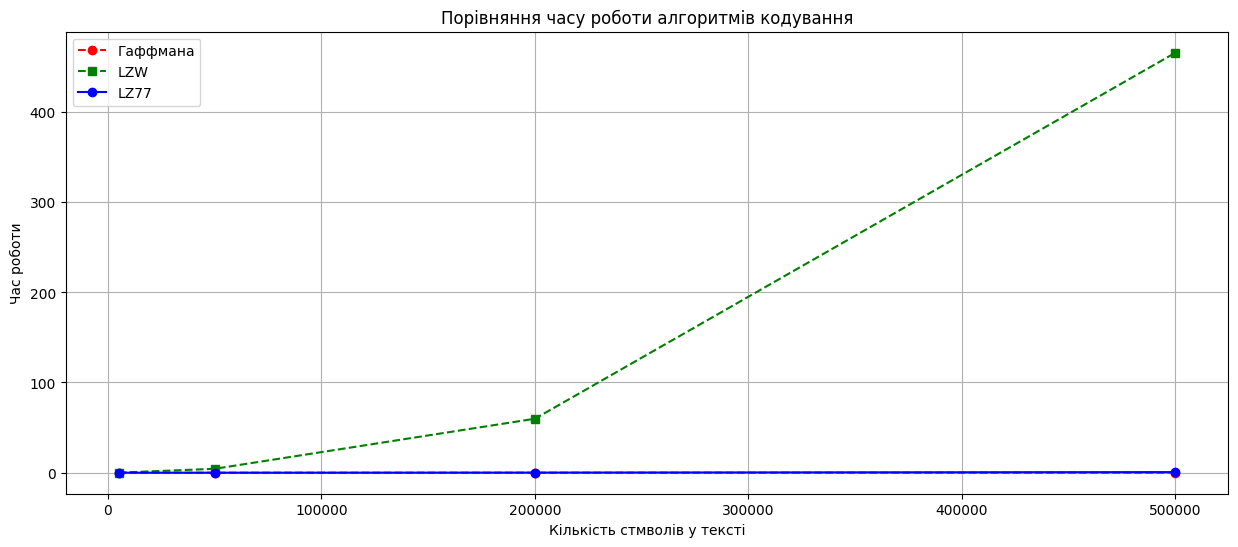

In [6]:
numbers_of_symbols = [5000, 50000, 200000, 500000]

plt.figure(figsize=(15, 6))


time_to_encode_huffman = [0.0010008811950683594, 0.018041610717773438, 0.017014026641845703, 0.05298161506652832] 
time_to_encode_lzw = [0.10303378105163574, 4.345434904098511, 59.84237599372864, 465.5066020488739] 
time_to_encode_lz77 = [0.03778958320617676, 0.025136947631835938, 0.14241576194763184, 0.667088508605957]

plt.plot(numbers_of_symbols, time_to_encode_huffman, label='Гаффмана', marker='o', linestyle='--', color='r')
plt.plot(numbers_of_symbols, time_to_encode_lzw, label='LZW', marker='s', linestyle='--', color='g')
plt.plot(numbers_of_symbols, time_to_encode_lz77, label='LZ77', marker='o', linestyle='-', color='b')
# plt.plot(numbers_of_symbols, time_our_prim, label='Алгоритм Прима наш', marker='s', linestyle='-', color='y')

plt.title('Порівняння часу роботи алгоритмів кодування')
plt.xlabel('Кількість стмволів у тексті')
plt.ylabel('Час роботи')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()

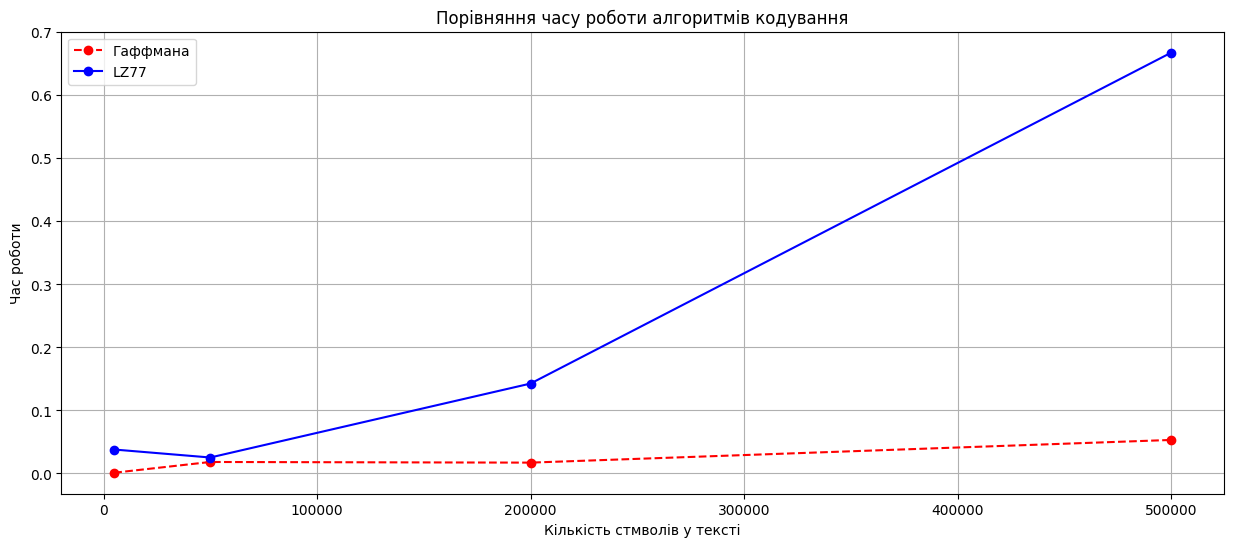

In [7]:
#Для кращого розуміння
numbers_of_symbols = [5000, 50000, 200000, 500000]

plt.figure(figsize=(15, 6))


time_to_encode_huffman = [0.0010008811950683594, 0.018041610717773438, 0.017014026641845703, 0.05298161506652832] 
# time_to_encode_lzw = [0.10303378105163574, 4.345434904098511, 59.84237599372864, 465.5066020488739] 
time_to_encode_lz77 = [0.03778958320617676, 0.025136947631835938, 0.14241576194763184, 0.667088508605957]

plt.plot(numbers_of_symbols, time_to_encode_huffman, label='Гаффмана', marker='o', linestyle='--', color='r')
# plt.plot(numbers_of_symbols, time_to_encode_lzw, label='LZW', marker='s', linestyle='--', color='g')
plt.plot(numbers_of_symbols, time_to_encode_lz77, label='LZ77', marker='o', linestyle='-', color='b')
# plt.plot(numbers_of_symbols, time_our_prim, label='Алгоритм Прима наш', marker='s', linestyle='-', color='y')

plt.title('Порівняння часу роботи алгоритмів кодування')
plt.xlabel('Кількість стмволів у тексті')
plt.ylabel('Час роботи')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()

Графік порівняння залежності часу розкодування від кількості символів у тексті:


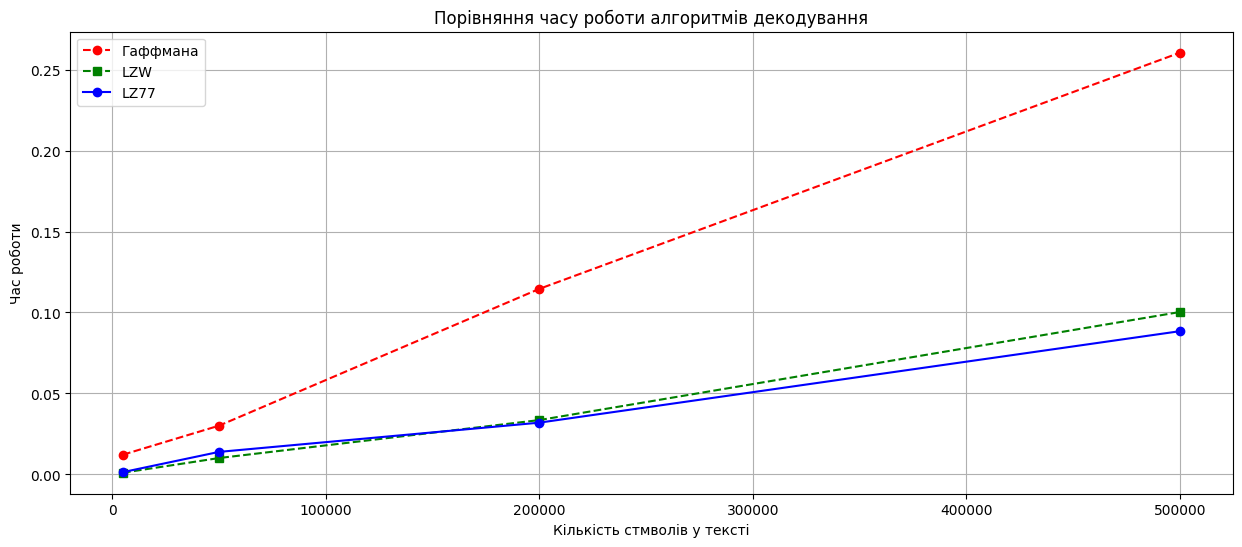

In [8]:
numbers_of_symbols = [5000, 50000, 200000, 500000]

plt.figure(figsize=(15, 6))


time_to_decode_huffman = [0.012144804000854492, 0.03007817268371582, 0.11458945274353027, 0.2605116367340088]
time_to_decode_lzw = [0.0010001659393310547, 0.010070562362670898, 0.03352808952331543, 0.10028433799743652]
time_to_decode_lz77 = [0.0013737678527832031, 0.013870954513549805, 0.031935691833496094, 0.08844470977783203]

plt.plot(numbers_of_symbols, time_to_decode_huffman, label='Гаффмана', marker='o', linestyle='--', color='r')
plt.plot(numbers_of_symbols, time_to_decode_lzw, label='LZW', marker='s', linestyle='--', color='g')
plt.plot(numbers_of_symbols, time_to_decode_lz77, label='LZ77', marker='o', linestyle='-', color='b')
# plt.plot(numbers_of_symbols, time_our_prim, label='Алгоритм Прима наш', marker='s', linestyle='-', color='y')

plt.title('Порівняння часу роботи алгоритмів декодування')
plt.xlabel('Кількість стмволів у тексті')
plt.ylabel('Час роботи')

plt.legend(loc='upper left')
plt.grid(True)

plt.show()


Висновок:

Алгоритм Гаффмана є алгоритмом алфавітного кодування, тобто закодована послідовність завжди буде більшою. Він найефективніше працює для текстів, в якій ймовірності появи символів є нерівномірними. Коли ж ймовірності майже одинакові, закодована послдовність стає значно довшою. 
Алгоритми Лемпеля-Зіва є алгоритмами стиску, тобто призначені для того, щоб зменшити розмір тексту. Алгоритм LZ77 кодує майже з одинаковою ефективність для різних даних, проте найкраще працює для повідомлень, в яких блоки повторюються. 
Алгоритм LZW найкраще працює для великих даних. Для малих повідомлень розмір стиснутого повідомлення стає більшим, але чим довший текст, тим ефективніше цей алгоритм його стискає. Алгоритм LZW, так як і LZ77 найкраще працює для текстів, у яких повторюються блоки.